# Dignitas Fund Donations from Individuals Analytics

In [53]:
import pandas as pd

df = pd.read_excel('./data/Download.xlsx', sheet_name = 'Лист 1', index_col=None, 
                   usecols = 'A, E, F, G, H, I, J, K, L, N')
df = df[df['From Account'].isna()]
df = df.drop('From Account', axis=1)

df = df[df['UAH'] < 40000]
df = df[df['To Account'] != 'ПриватБанк Адмін рахунок']
#df = df[df['To Account'] != 'ПриватБанк Люті пташки']
df = df[df['Project'] != 'МЛПК (SoA)']
df = df[df['Subcategory'] != 'Донати Лопати']
df = df[df['Subcategory'] != 'Донати Люті пташки']
df = df[df['Subcategory'] != 'Адмін Донати']
df = df[df['Subcategory'] != 'Донати Дрони']
df = df[df['Subcategory'] != 'Донати Вей Фор Пей']

#df_FOP = df[df['Commentary'].str.contains('ФОП')]
#df_large = df[df['UAH']>=10000]['Commentary']

In [54]:
from datetime import date

df[df['Date'].dt.date== date.today()]['UAH'].sum()

41547.2

In [3]:
def format_money(value):
    return '{:,.2f}'.format(value)

## Totally raised

In [55]:
format_money(df['UAH'].sum())

'846,526.62'

In [5]:
amt_by_acc = pd.DataFrame(df.groupby('To Account')['UAH'].sum())
amt_by_acc = amt_by_acc.sort_values('UAH', ascending = False)
amt_by_acc.applymap(format_money)

,UAH
To Account,
ПриватБанк Загальний рахунок зборів,"404,752.90"
"АТ ""УНІВЕРСАЛ БАНК"" (МоноБанк загальний)","190,286.12"
ПриватБанк Люті пташки,"71,271.50"
Приват 1000 дронів для України,"19,050.00"
ПриватБанк євро,"1,370.44"


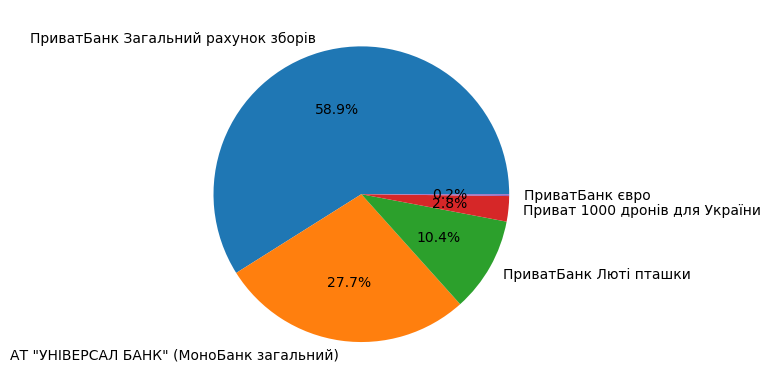

In [47]:
import matplotlib.pyplot as plt

plt.pie(amt_by_acc['UAH'], labels = amt_by_acc.index, autopct='%1.1f%%')
plt.show()

## Donations statistics

In [56]:
pd.DataFrame(df['UAH'].describe().map(format_money))

,UAH
count,618.00
mean,"1,369.78"
std,"3,331.02"
min,0.01
25%,200.00
50%,400.00
75%,"1,000.00"
max,"37,000.00"


### Number of donations by bank

In [8]:
num_by_acc = pd.DataFrame(df.groupby('To Account')['UAH'].count())
num_by_acc.sort_values('UAH', ascending = False)

,UAH
To Account,
ПриватБанк Загальний рахунок зборів,313
"АТ ""УНІВЕРСАЛ БАНК"" (МоноБанк загальний)",83
ПриватБанк Люті пташки,73
Приват 1000 дронів для України,18
ПриватБанк євро,1


## Most frequent donation amounts

In [9]:
from collections import Counter

pd.DataFrame(Counter(df['UAH']).most_common(10), columns=['UAH', 'frequency'])

,UAH,frequency
0,200.0,69
1,500.0,67
2,1000.0,60
3,100.0,49
4,300.0,36
5,2000.0,15
6,50.0,15
7,5000.0,9
8,3000.0,9
9,400.0,8


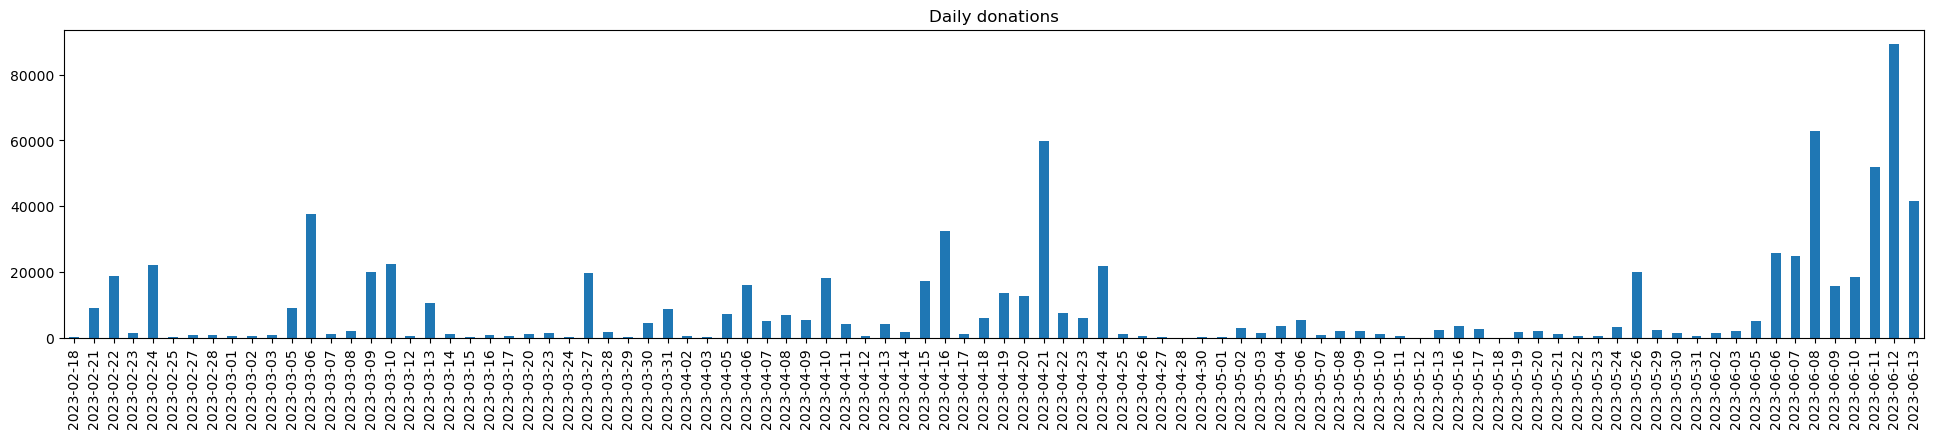

In [57]:
plt.figure(figsize=(24, 4)) 
#fig, ax = plt.subplots()


df['UAH'].groupby(df['Date'].dt.to_period('d')).sum().plot(
    kind='bar', xlabel='',  title ='Daily donations')

#ax.yaxis.set_major_formatter('{x:,.0f}')
#ax.yaxis.set_tick_params(which='major', 
#                         labelleft=True, labelright=False)
plt.show()

## Weekly donations

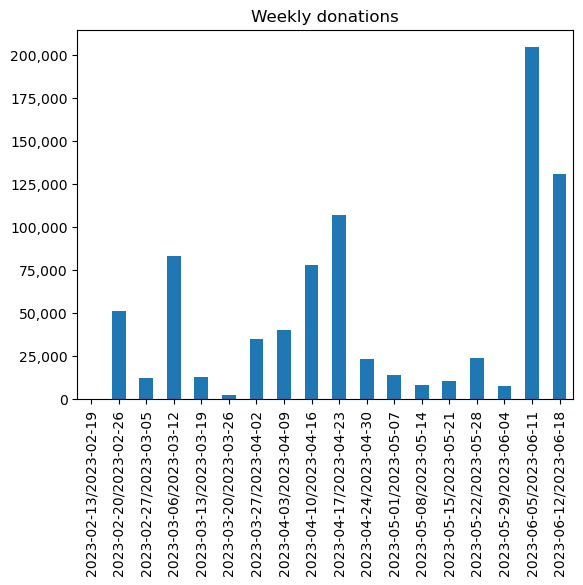

In [58]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


tmp = df['UAH'].groupby(df['Date'].dt.to_period('W')).sum()
tmp.plot(kind='bar', xlabel='', title = 'Weekly donations')
# dollar ticksb
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.yaxis.set_tick_params(which='major',
                         labelleft=True, labelright=False)
plt.show()

## Top donation days are Tue-Fri

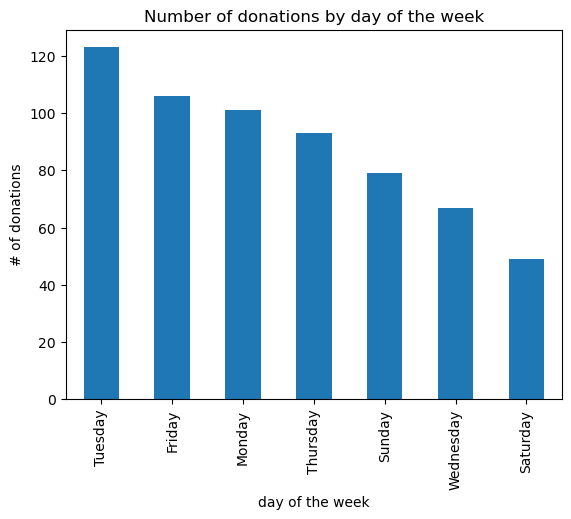

In [59]:
import warnings
warnings.filterwarnings("ignore")

tmp=df.groupby([ df['Date'].dt.day_name()] )['UAH'].count(
).sort_values(ascending = False).plot(
    kind='bar', title ='Number of donations by day of the week', 
    xlabel = 'day of the week', ylabel = '# of donations')

## Donations by hour

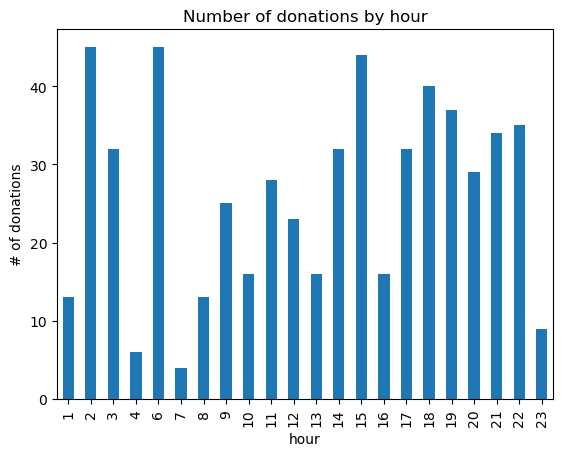

In [38]:
tmp = df.groupby([ df['Date'].dt.hour] )['UAH'].count().plot(
    kind='bar', xlabel = 'hour', ylabel = '# of donations', 
    title = 'Number of donations by hour')

## People who donated multiple times

In [39]:
num_by_person = pd.DataFrame(df.groupby('Commentary')['UAH'].count())
num_by_person = num_by_person[num_by_person['UAH']>1]
num_by_person.sort_values('UAH', ascending = False).to_excel(
    'donated more than ones.xlsx', index = False)
num_by_person.shape[0]

30